In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers,regularizers

In [6]:
df_train = pd.read_csv(r"C:\Users\prati\Downloads\mnist_train.csv")
df_test = pd.read_csv(r"C:\Users\prati\Downloads\mnist_test.csv")

In [9]:
X_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [10]:
X_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [11]:
X_train = X_train/255.0
X_test = X_test/255.0

In [32]:
def create_model(use_l2=False,use_dropout=False):
    reg = regularizers.l2(0.001) if use_l2 else None
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128,activation = 'relu',kernel_regularizer = reg),
        layers.Dropout(0.5) if use_dropout else layers.Lambda(lambda x:x),
        layers.Dense(128,activation = 'relu',kernel_regularizer = reg),
        layers.Dense(10,activation = 'softmax')
    ])
    model.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)
    return model

In [36]:
histories = {}
configs = {
    "Baseline":create_model(),
    "L2Regulariation":create_model(use_l2 = True),
    "Dropout":create_model(use_dropout = True),
}
for name,model in configs.items():
    print(f"\nTraining{name}")
    history = model.fit(
        X_train,y_train,
        validation_data = (X_test,y_test),
        epochs = 3,
        batch_size = 128,
        verbose = 2
    )
    histories[name]=history


TrainingBaseline
Epoch 1/3
469/469 - 2s - 5ms/step - accuracy: 0.9095 - loss: 0.3142 - val_accuracy: 0.9549 - val_loss: 0.1502
Epoch 2/3
469/469 - 1s - 3ms/step - accuracy: 0.9635 - loss: 0.1235 - val_accuracy: 0.9635 - val_loss: 0.1165
Epoch 3/3
469/469 - 1s - 3ms/step - accuracy: 0.9739 - loss: 0.0863 - val_accuracy: 0.9691 - val_loss: 0.0967

TrainingL2Regulariation
Epoch 1/3
469/469 - 3s - 6ms/step - accuracy: 0.9093 - loss: 0.5408 - val_accuracy: 0.9522 - val_loss: 0.3407
Epoch 2/3
469/469 - 2s - 3ms/step - accuracy: 0.9567 - loss: 0.3033 - val_accuracy: 0.9642 - val_loss: 0.2600
Epoch 3/3
469/469 - 2s - 3ms/step - accuracy: 0.9665 - loss: 0.2416 - val_accuracy: 0.9703 - val_loss: 0.2173

TrainingDropout
Epoch 1/3
469/469 - 3s - 6ms/step - accuracy: 0.8514 - loss: 0.4881 - val_accuracy: 0.9448 - val_loss: 0.1848
Epoch 2/3
469/469 - 2s - 3ms/step - accuracy: 0.9281 - loss: 0.2426 - val_accuracy: 0.9591 - val_loss: 0.1345
Epoch 3/3
469/469 - 2s - 3ms/step - accuracy: 0.9398 - loss:

In [38]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

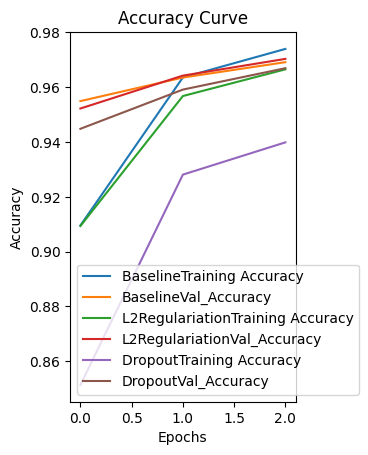

In [42]:
plt.subplot(1,2,1)
for name,history in histories.items():
    plt.plot(history.history['accuracy'],label=f'{name}Training Accuracy')
    plt.plot(history.history['val_accuracy'],label=f'{name}Val_Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

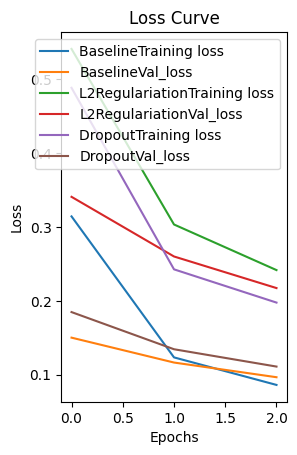

In [43]:
plt.subplot(1,2,1)
for name,history in histories.items():
    plt.plot(history.history['loss'],label=f'{name}Training loss')
    plt.plot(history.history['val_loss'],label=f'{name}Val_loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()